## Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import DataGenerator, KneeLocator

## Import data

In [37]:
dfs = pd.read_csv("only_center_global.csv")
#lat=[dfs["lat"][it] for it in range(len(dfs["lat"])) if dfs["label"][it]==4]
#lng=[dfs["lng"][it] for it in range(len(dfs["lng"])) if dfs["label"][it]==4]
#lat_out=[dfs["lat"][it] for it in range(len(dfs["lat"])) if dfs["label"][it]!=4]
#lng_out=[dfs["lng"][it] for it in range(len(dfs["lng"])) if dfs["label"][it]!=4]
lat=[dfs["lat"][it] for it in range(len(dfs["lat"]))]
lng=[dfs["lng"][it] for it in range(len(dfs["lng"]))]
lat_out=[dfs["lat"][it] for it in range(len(dfs["lat"]))]
lng_out=[dfs["lng"][it] for it in range(len(dfs["lng"]))]

## Plot the results (DB-SCAN already runned)

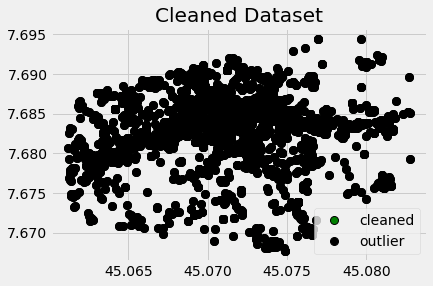

In [38]:
plt.title('Cleaned Dataset')
plt.plot(lat,lng, 'o', markerfacecolor="green", markeredgecolor='k', markersize=8,label="cleaned")
plt.plot(lat_out,lng_out, 'o', markerfacecolor="black", markeredgecolor='k', markersize=8,label="outlier")
plt.legend()

## Create the joined vector for K-Means

In [39]:
X = np.array(list(zip(lat, lng))).reshape(len(lat), 2)

## Prepare structures to save results

In [40]:
distortions = []
silhouette_coefficients=[]

## Number of cluster to cycle for the tuning phase

In [41]:
K = range(2,30)

## Run the K-Means algorithm with multiple configurations

In [42]:
print("RUNNING:")
for k in K:
    print(f"\tk:{k};",end=" ")
    kmeanModel = KMeans(n_clusters=k).fit(X)
    label=kmeanModel.fit_predict(X)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(X, kmeanModel.labels_)
    silhouette_coefficients.append(score)

RUNNING:
	k:2; 	k:3; 	k:4; 	k:5; 	k:6; 	k:7; 	k:8; 	k:9; 	k:10; 	k:11; 	k:12; 	k:13; 	k:14; 	k:15; 	k:16; 	k:17; 	k:18; 	k:19; 	k:20; 	k:21; 	k:22; 	k:23; 	k:24; 	k:25; 	k:26; 	k:27; 	k:28; 	k:29; 

## Apply the elbow-method to tune results

Text(0.5, 0, 'k')

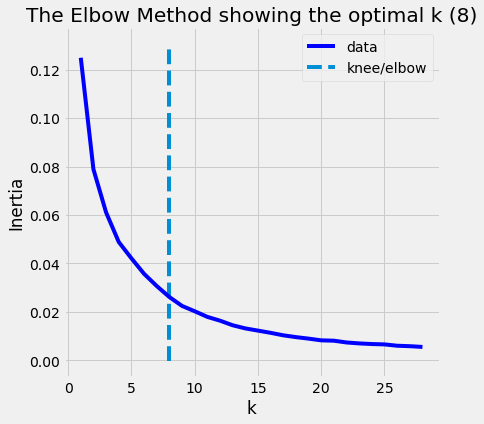

In [43]:
kneedle = KneeLocator(range(1,len(distortions)+1), distortions, S=1.0, curve="convex", direction="decreasing")#,interp_method='polynomial')
kneedle.plot_knee()
plt.title(f"The Elbow Method showing the optimal k ({str(round(kneedle.knee, 3))})")
plt.ylabel("Inertia")
plt.xlabel("k")

## Apply the silhouette-method to tune results

Text(0, 0.5, 'Silhouette Coefficient')

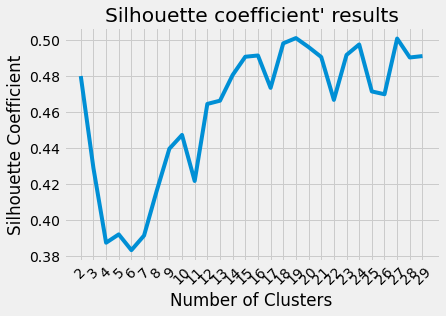

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.title("Silhouette coefficient' results")
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.xticks(rotation=45)
plt.ylabel("Silhouette Coefficient")

## Representation with elbow's parameter

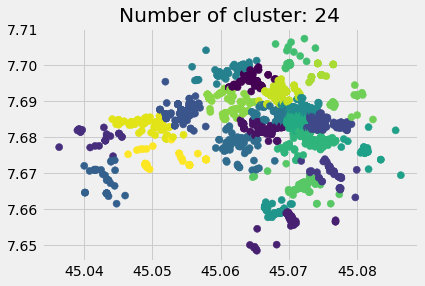

In [35]:
kmeanModel = KMeans(n_clusters=24).fit(X)
label=kmeanModel.fit_predict(X)
plt.title('Number of cluster: 24')
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis')

## Representation with silhouette's parameter

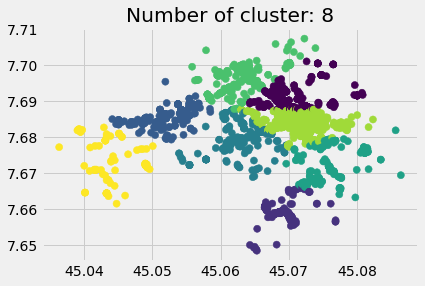

In [36]:
kmeanModel = KMeans(n_clusters=8).fit(X)
label=kmeanModel.fit_predict(X)
plt.title('Number of cluster: 8')
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis')